# 1.Preparación de los datos y configuración inicial

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# PCA
from sklearn.decomposition import PCA
# Tensorflow
import tensorflow as tf
from tensorflow import keras
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Codificación
from sklearn.preprocessing import OneHotEncoder

# Genericas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import math

## Limpieza del dataset

In [ ]:
X = np.load('/content/drive/MyDrive/Maestría/DMA/AUSTRAL_MCD_FACE_v2.npy')
y = np.load('/content/drive/MyDrive/Maestría/DMA/AUSTRAL_MCD_FACE_TARGET_v2.npy')

In [ ]:
unique, counts = np.unique(y, return_counts=True)

# Imprime los valores únicos y las cantidades de repeticiones
print("Persona|Aparece|")
print("--- | ---|---") 
for i in range(len(unique)):
    print("{} | {} |---".format(unique[i], counts[i]))

Persona|Aparece|Observaciones
--- | ---|---
Andres | 22 |---
Carla | 21 |Borrar
Claudia | 12 |---
Edu | 27 |---
Elemir | 12 |---
Fernanda | 20 |---
Geronimo | 11 |---
Hernan | 18 |---
Jiang | 19 |---
Joaquin | 10 |---
Josefina | 12 |---
Julieta | 12 |---
Lujan | 10 |---
Mai | 15 |---
Marcelo G | 10 |---
Marcelo T | 16 |---
Maribel | 10 |---
Marisa | 10 |---
Nestor | 10 |---
Oscar | 10 |---
Ramon | 10 |---
Rodrigo E | 9 |---
Rodrigo E.jpg | 1 |Borrar
Rodrigo G | 11 |Borrar
Sebastian | 14 |---
Silvia | 9 |La que menos aparece

In [ ]:
X = np.delete(X, np.where(y == 'Rodrigo E.jpg'), 0)
y = np.delete(y, np.where(y == 'Rodrigo E.jpg'), 0)

X = np.delete(X, np.where(y == 'Rodrigo G'), 0)
y = np.delete(y, np.where(y == 'Rodrigo G'), 0)

X = np.delete(X, np.where(y == 'Carla'), 0)
y = np.delete(y, np.where(y == 'Carla'), 0)

In [ ]:
nombres_unicos = np.unique(y)  # Obtener los nombres únicos en el arreglo

registros_por_nombre = 10  # Número de registros a recopilar por cada nombre

resultados = []
resultados2 = []

for nombre in nombres_unicos:
    indices = np.where(y == nombre)[0][:registros_por_nombre]
    registros = y[indices]
    registros2 = X[indices]
    resultados.extend(registros)
    resultados2.extend(registros2)

resultados = np.array(resultados)

y = resultados
X = np.array(resultados2)
#print(resultados)
#print(len(resultados))
#print(len(resultados2))

In [ ]:
# Lista de nombres
nombres = np.unique(y)

# Crear un diccionario para mapear cada nombre a un valor numérico
mapeo_nombres = {nombre: i for i, nombre in enumerate(np.unique(nombres))}

# Crear una matriz de valores numéricos codificados
nombres_codificados = np.array([mapeo_nombres[nombre] for nombre in nombres])

# Convertir los valores numéricos de vuelta a los nombres originales
#nombres_decodificados = np.array([list(mapeo_nombres.keys())[list(mapeo_nombres.values()).index(codigo)] for codigo in nombres_codificados])
#print(nombres_decodificados)  # salida: ['Juan' 'María' 'Pedro' 'Juan' 'Luisa' 'María']

#categorias_unicas = np.unique(y)
y = np.searchsorted(nombres, y)


In [ ]:
percentage = 0.3
X_train, X_test, t_train, t_test = train_test_split(X, y, stratify=y, test_size=percentage, random_state=42)
targets = y.reshape(-1, 1)

In [ ]:
unique, counts = np.unique(t_train, return_counts=True)

data_train = pd.DataFrame({'Persona': unique, 'Aparece': counts}, columns=['Persona', 'Aparece'])
data_train 

,Persona,Aparece
0,0,7
1,1,7
2,2,7
3,3,7
4,4,7
5,5,7
6,6,7
7,7,7
8,8,7
9,9,7


In [ ]:
unique, counts = np.unique(t_test, return_counts=True)

data_test = pd.DataFrame({'Persona': unique, 'Aparece': counts}, columns=['Persona', 'Aparece'])
data_test

,Persona,Aparece
0,0,3
1,1,3
2,2,3
3,3,3
4,4,3
5,5,3
6,6,3
7,7,3
8,8,3
9,9,3


# 2.Data Augmentation

Vemos las componentes del conjunto en test y train.

In [ ]:
print("X_train shape", X_train.shape)
print("t_train shape", t_train.shape)
print("X_test shape", X_test.shape)
print("t_test shape", t_test.shape)
print("Numero de target", len(np.unique(y)))

print("\nEtiquetas distintas en cada target")
print("Numero de train", len(np.unique(t_train)))
print("Numero de test", len(np.unique(t_test)))


X_train shape (159, 150, 150)
t_train shape (159,)
X_test shape (69, 150, 150)
t_test shape (69,)
Numero de target 23

Etiquetas distintas en cada target
Numero de train 23
Numero de test 23


Graficamos algunos ejemplos del conjunto dado

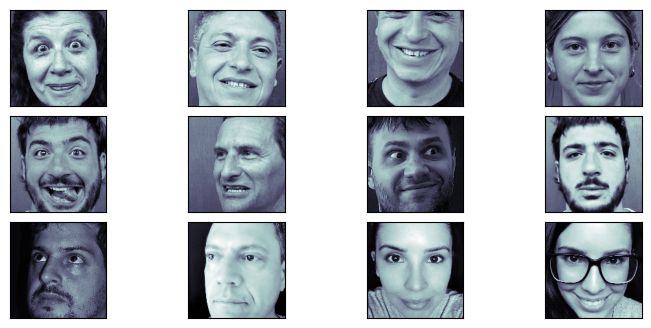

In [ ]:
# show dataset.
fig, axes = plt.subplots(3, 4, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='bone')

In [ ]:
# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=12,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='constant'   #reflext, default. fill mode determines how any empty pixels are filled after applying transformations.
)

# Reshape X_train if needed (assuming it has shape (num_samples, height, width))
X_train_aux = X_train.reshape(X_train.shape[0], 150, 150, 1)

# Perform data augmentation
augmented_images = []
augmented_labels = []

for image, label in zip(X_train_aux, t_train):
    iterator = datagen.flow(np.expand_dims(image, 0), batch_size=1)
    augmented_image = iterator.next()[0]
    augmented_images.append(augmented_image)
    augmented_labels.append(label)

# Convert the augmented images and labels back to numpy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)



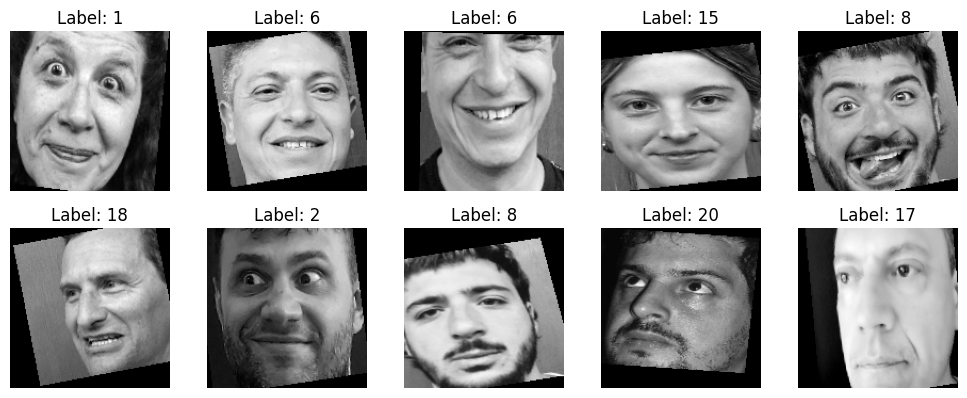

In [ ]:
# Define a function to plot images
def plot_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].reshape(150, 150), cmap='gray')
        plt.title("Label: {}".format(labels[i]))
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot augmented images
plot_images(augmented_images[:10], augmented_labels[:10])

In [ ]:
# Concatenate the augmented images and labels with the original datasets
X_train = np.concatenate((X_train, augmented_images.reshape(159, 150, 150)))
t_train = np.concatenate((t_train, augmented_labels))

In [ ]:
unique, counts = np.unique(t_train, return_counts=True)
import pandas as pd
data_aumentada = pd.DataFrame({'Persona': unique, 'Aparece': counts}, columns=['Persona', 'Aparece'])
data_aumentada 

,Persona,Aparece
0,0,14
1,1,14
2,2,14
3,3,14
4,4,14
5,5,14
6,6,14
7,7,14
8,8,14
9,9,14


# 2.PCA

Hago un reshaping para poder hacer el PCA



In [ ]:
# Reshaping the dataset
X_train = X_train.reshape(X_train.shape[0], 22500) 
X_test = X_test.reshape(X_test.shape[0], 22500)  

# Change integers to 32-bit floating point numbers
X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (318, 22500)
Testing matrix shape (69, 22500)


Estandarizo la variable, dividiendo 255 ya que las imagenes estaban en escala de grises.

In [ ]:
print(X_train.min(), X_train.max())
print(X_test.min(), X_test.max())

X_train = X_train/255.0
X_test = X_test/255.0

print(X_train.min(), X_train.max())
print(X_test.min(), X_test.max())

0.0 255.0
0.0 255.0
0.0 1.0
0.0 1.0


Realizo PCA que explique el 90% de la variabilidad de los datos. No realizo todos los pasos que hicimos en la unidad 3 del modulo 3 ya que no es el objetivo del practico. Asi que utilizo directamente los parametro `n_components=.90`.

In [ ]:
pca = PCA(n_components=.90, svd_solver = 'full')
pca.fit(X_train)

PCA(n_components=0.9, svd_solver='full')

***De la documentacion oficial:*** If 0 < n_components < 1 and svd_solver == 'full', select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.



In [ ]:
print(f'Nro de componentes a utilizar en el PCA : {pca.n_components_}')

Nro de componentes a utilizar en el PCA : 101


Con 100 dimensiones, preservamos 0.9 del varianza.


Aplico el PCA a train y test

In [ ]:
train_img = pca.transform(X_train)
test_img = pca.transform(X_test)

print(f'train_img shape : {train_img.shape}')
#print(f'test_img shape : {test_img.shape}')

train_img shape : (318, 100)


Las etiquetas de `t_train` y `t_test` son números entre 0 y 24.

Convertimos las etiquetas de clase a la codificación 1-de-K. Para ello utilizamos la función `keras.utils.to_categorical` (similar al  `OneHotEncoder` de `sklearn`).


In [ ]:
encoder = OneHotEncoder()
t_train_ohe = encoder.fit_transform(t_train.reshape(-1, 1)).toarray()
t_test_ohe = encoder.fit_transform(t_test.reshape(-1, 1)).toarray()

print(t_train_ohe[:3], t_train[:3])
print(t_test_ohe[:3], t_test[:3])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] [1 6 6]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] [11 10 12]


# 3.Creación de la red - Tensorflow

In [ ]:
model = keras.models.Sequential()

# Input layer
model.add(keras.layers.InputLayer(input_shape=(pca.n_components_,)))

# Dos capas ocultas con 64 neuronas cada una
model.add(keras.layers.Dense(64, activation='linear'))
model.add(keras.layers.Dense(64, activation='linear'))

# Capa de salida. Como es una clasificación multi-clase, usamo K (acá 10) unidades.
model.add(keras.layers.Dense(23, activation='softmax'))

Ahora usamos el método `summary` para ver una descripción de lo que acabamos de construir

In [ ]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 64)                6592      
                                                                 
 dense_68 (Dense)            (None, 64)                4160      
                                                                 
 dense_69 (Dense)            (None, 23)                1495      
                                                                 
Total params: 12,247
Trainable params: 12,247
Non-trainable params: 0
_________________________________________________________________


Otra forma de verlo es con un grafico

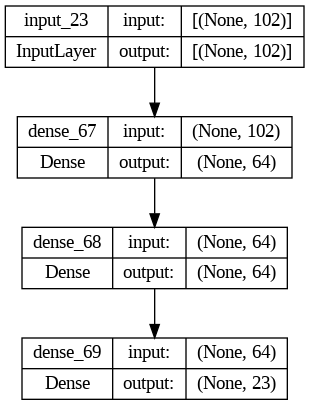

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

# 4.Compilación - Entrenamiento - Análisis

## Compilación

Para que el modelo funcione, primero hay que compilarlo.

En este punto, hay que proporcionar dos datos cruciales
1. La función de error (también conocida como función de pérdida)
2. La función del optimizador.

In [ ]:
#opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', metrics=['accuracy', keras.metrics.Recall(class_id=5)])

## Entrenamiento

Agrego callback que puede detener el entrenamiento antes de tiempo si no se ve ninguna mejora en la pérdida de validación.

In [ ]:
early = keras.callbacks.EarlyStopping(patience=15, monitor='val_loss',
                                      restore_best_weights=True)

In [ ]:
early = keras.callbacks.EarlyStopping(patience=15, monitor='val_loss',
                                      restore_best_weights=True)
ajuste = model.fit(epochs=100, x=train_img, y=t_train_ohe, validation_data=(test_img, t_test_ohe), callbacks=[early,])

Epoch 1/100
10/10 [==============================] - 1s 36ms/step - loss: 6.1993 - accuracy: 0.0566 - recall_18: 0.0000e+00 - val_loss: 3.9928 - val_accuracy: 0.1304 - val_recall_18: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 3.9699 - accuracy: 0.1635 - recall_18: 0.0000e+00 - val_loss: 3.2830 - val_accuracy: 0.2174 - val_recall_18: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 3.0375 - accuracy: 0.2421 - recall_18: 0.0000e+00 - val_loss: 2.9196 - val_accuracy: 0.3188 - val_recall_18: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 2.4371 - accuracy: 0.3491 - recall_18: 0.0000e+00 - val_loss: 2.6654 - val_accuracy: 0.3913 - val_recall_18: 0.3333
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 1.9881 - accuracy: 0.4591 - recall_18: 0.2857 - val_loss: 2.4659 - val_accuracy: 0.4348 - val_recall_18: 0.3333
Epoch 6/100
10/10 [===========================

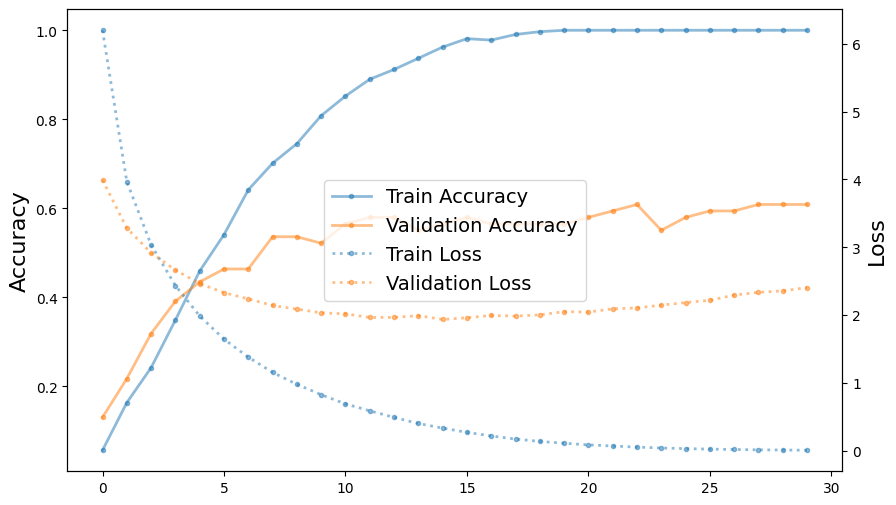

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

kw = {'marker': '.', 'lw': 2, 'alpha': 0.5}
l0, = ax.plot(ajuste.history['accuracy'], label='Train Accuracy', **kw)
l1, = ax.plot(ajuste.history['val_accuracy'], label='Validation Accuracy', **kw)

ax2 = ax.twinx()
ll0, = ax2.plot(ajuste.history['loss'], ls=':', color='C0', label='Train Loss', **kw)
ll1, = ax2.plot(ajuste.history['val_loss'], ls=':', color='C1', label='Validation Loss', **kw)

ax.set_ylabel('Accuracy', fontsize=16)
ax2.set_ylabel('Loss', fontsize=16)

ax.legend(handles=[l0, l1, ll0, ll1], loc='center', fontsize=14)
# plt.legend(loc=0)

## Predición

In [ ]:
model.evaluate(test_img, t_test_ohe)

3/3 [==============================] - 0s 6ms/step - loss: 1.9371 - accuracy: 0.5652 - recall_18: 0.6667


[1.9370663166046143, 0.5652173757553101, 0.6666666865348816]

In [ ]:
# Calcular las predicciones y buscamos los casos con error
y_test = np.argmax(model.predict(test_img), axis=1)

ierror = (y_test - t_test != 0)

# Cuántos hay
print('Hay {} errores en el conjunto de validación sobre un total de {} imagenes'.format(np.sum(ierror), len(test_img)))

3/3 [==============================] - 0s 3ms/step
Hay 30 errores en el conjunto de validación sobre un total de 69 imagenes


In [ ]:
#Decodificar
# Convertir los valores numéricos de vuelta a los nombres originales
y_test_deco = np.array([list(mapeo_nombres.keys())[list(mapeo_nombres.values()).index(codigo)] for codigo in y_test])
t_test_deco = np.array([list(mapeo_nombres.keys())[list(mapeo_nombres.values()).index(codigo)] for codigo in t_test])


In [ ]:
for i in range(len(y_test)):
  if(ierror[i]):
      print('{} FALSE: Prediction: \033[1m{}\033[0m Truth: \033[1m{}\033[0m'.format(i, y_test_deco[i], t_test_deco[i]))
  #else:
  #    print('{} TRUE: Prediction: {} Truth: {}'.format(i, y_test_deco[i], t_test_deco[i]))

2 FALSE: Prediction: Silvia Truth: Mai
3 FALSE: Prediction: Marcelo T Truth: Andres
4 FALSE: Prediction: Maribel Truth: Silvia
5 FALSE: Prediction: Geronimo Truth: Elemir
6 FALSE: Prediction: Sebastian Truth: Maribel
7 FALSE: Prediction: Geronimo Truth: Marisa
11 FALSE: Prediction: Ramon Truth: Marcelo G
13 FALSE: Prediction: Marisa Truth: Marcelo T
17 FALSE: Prediction: Josefina Truth: Silvia
24 FALSE: Prediction: Hernan Truth: Nestor
25 FALSE: Prediction: Maribel Truth: Josefina
27 FALSE: Prediction: Sebastian Truth: Geronimo
29 FALSE: Prediction: Mai Truth: Elemir
30 FALSE: Prediction: Mai Truth: Oscar
32 FALSE: Prediction: Nestor Truth: Fernanda
34 FALSE: Prediction: Maribel Truth: Josefina
37 FALSE: Prediction: Silvia Truth: Claudia
38 FALSE: Prediction: Claudia Truth: Mai
39 FALSE: Prediction: Ramon Truth: Claudia
40 FALSE: Prediction: Hernan Truth: Sebastian
44 FALSE: Prediction: Sebastian Truth: Oscar
45 FALSE: Prediction: Nestor Truth: Claudia
47 FALSE: Prediction: Jiang Truth

<ipython-input-221-19f8ec4e7dcb>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n_rows = np.int(n_images / n_columns)


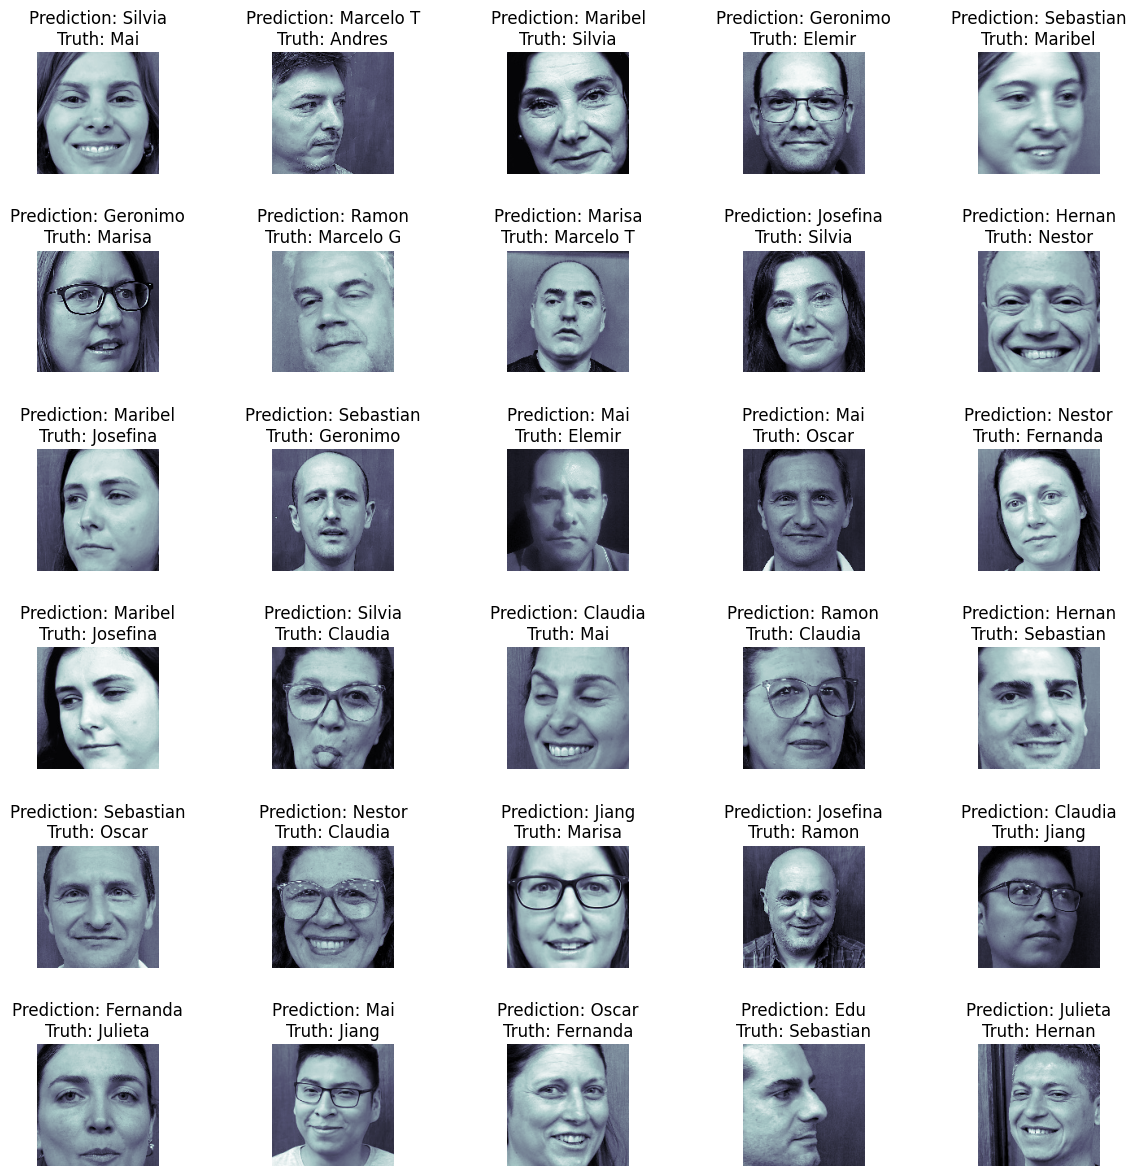

In [ ]:

X_test_print = X_test.reshape(69,150,150)

n_images = sum(ierror)
n_columns = 5

n_rows = np.int(n_images / n_columns)

if n_images % n_columns != 0:
    n_rows += 1

fig, axs = plt.subplots(ncols=n_columns, nrows=n_rows, figsize=(12, 2*n_rows))

# Veamos algunos ejemplos de los datos en los que se equivocó
for i, ax in zip(range(n_images), axs.flatten()):
    ax.imshow(X_test_print[ierror][i], cmap='bone')
    ax.set_title('Prediction: {}\nTruth: {}'.format(y_test_deco[ierror][i], t_test_deco[ierror][i]))
    
fig.tight_layout(pad=0.7)
for ax in axs.flatten():
    ax.axis('off')
